<a href="https://colab.research.google.com/github/anandaptralmira/textmining/blob/master/Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
!pip install Sastrawi

     |████████████████████████████████| 215kB 6.0MB/s 


In [81]:
# Import Library
import pandas as pd
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import string 
import re
import nltk
from google.colab import files

nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter
from wordcloud import STOPWORDS
from wordcloud import WordCloud

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anandaptralmira/textmining/master/id-hatespeech-detection-master.csv' , sep=",", encoding="ISO-8859-1")
df.head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    object
 1   Tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


(534,)
(179,)
(534,)
(179,)


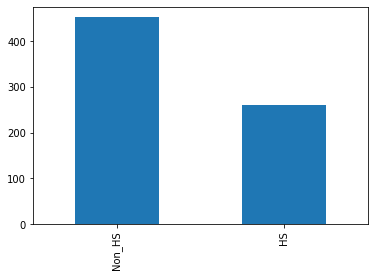

In [6]:
#cek proporsi label data
pd.value_counts(df['Label']).plot.bar()

In [7]:
df_fix = df.append(df, ignore_index=True)

In [8]:
df_fix

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
1421,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
1422,HS,"Betul bang hancurkan merka bang, musnahkan chi..."
1423,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
1424,HS,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


Hate speech


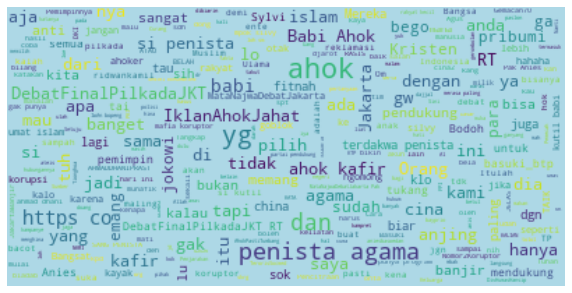

In [9]:
from wordcloud import WordCloud,STOPWORDS
word = df.Tweet[df['Label']=='HS'].astype('string')
wordcloud = WordCloud(max_font_size=20, max_words=500, background_color="lightblue").generate_from_text(' '.join(word))
print('Hate speech')
plt.figure(figsize= (10,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Non Hate speech


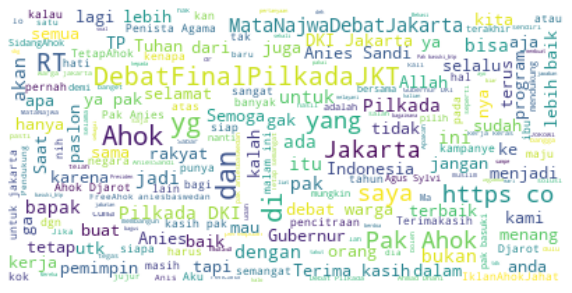

In [10]:
from wordcloud import WordCloud,STOPWORDS
word = df.Tweet[df['Label']=='Non_HS'].astype('string')
wordcloud = WordCloud(max_font_size=20, max_words=500, background_color="white").generate_from_text(' '.join(word))
print('Non Hate speech')
plt.figure(figsize= (10,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [11]:
# Cleaning the tweets
def preprocessing(a,b):
    data_fix = []
    from nltk.corpus import stopwords
    for i in range(len(b)):
        teks = re.sub('[^a-zA-Z]', ' ', a[i])
        # Remove mentions
        teks = re.sub(r'@[A-Za-z0-9_]+', '', a[i])
        # Remove hashtags
        teks = re.sub(r'#', '', a[i])
        # Remove retweets:
        teks = re.sub(r'RT : ', '', a[i])
        # Remove urls
        teks = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', a[i])
        #Case Folding
        teks = teks.lower()
        #Tokinize
        teks = teks.split()
        #Stopword + Stemming
        stemmer = StemmerFactory().create_stemmer()        
        teks = [stemmer.stem(word) for word in teks if not word in set(stopwords.words('indonesian'))]
        teks = [word for word in teks if len (word) > 3]
        teks = ' '.join(teks)
        data_fix.append(teks)
    return data_fix

In [12]:
length_set = df_fix['Label'].tolist()

In [13]:
data_set = preprocessing(df_fix['Tweet'],length_set)

In [14]:
df_fix['Prepro'] = pd.Series(data_set).values

In [ ]:
df_fix

In [28]:
train = df_fix['Prepro']

In [30]:
tfidf = TfidfVectorizer()
train_data = tfidf.fit_transform(train)

In [31]:
y = df_fix['Label']
y = y.values
X = train_data
X = X.toarray()

In [42]:
le = LabelEncoder()
y = le.fit_transform(df_fix['Label'])

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)    
Feature_scaler = MinMaxScaler(feature_range=(0.01, 0.99))
x_train = Feature_scaler.fit_transform(np.array(x_train))
x_test = Feature_scaler.fit_transform(np.array(x_test))

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_preds = knn.predict(x_test)
print(f"Accuracy : ",metrics.accuracy_score(y_test, y_preds))

In [ ]:
# Show the Confussion Matrix
cm_knn = metrics.confusion_matrix(y_test, y_preds)
cm_knn

In [94]:
acc_knn = metrics.accuracy_score(y_test, y_preds)
prec_knn = metrics.precision_score(y_test, y_preds)
rec_knn = metrics.recall_score(y_test, y_preds)
f1_knn = metrics.f1_score(y_test, y_preds)
kappa_knn = metrics.cohen_kappa_score(y_test, y_preds)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

Accuracy: 0.7482517482517482
Precision: 0.7094017094017094
Recall: 0.9764705882352941
F1 Score: 0.8217821782178217
Cohens Kappa Score: 0.4277456647398844
